# Week 1 Notebook

## Imports

In [75]:
#Main Imports
import cv2
import numpy as np
import os
from distances import find_distance, distance_metrics
from histogram import calc_3d_hist, calc_1d_hist
import get_images_and_labels
import evaluation as eval
import pickle
import glob


In [76]:
#Notebook imports
import matplotlib.pyplot as plt
import random

In [77]:
cur_path = os.getcwd()

# Available color_spaces
color_spaces = {
"RGB": cv2.COLOR_BGR2RGB,
"HSV": cv2.COLOR_BGR2HSV,
"YCRCB": cv2.COLOR_BGR2YCrCb,
"LAB": cv2.COLOR_BGR2LAB
}

In [78]:
# Get all 3 image datasets at the start
#museum_imgs = get_images_and_labels.get_museum_dataset(cur_path)
#query_set1_imgs = get_images_and_labels.get_query_set_images(cur_path, "qsd1")
#query_set2_imgs = get_images_and_labels.get_query_set_images(cur_path, "qsd2")

#Get Query Set 2 Masks
#query_set2_masks = get_images_and_labels.get_qsd2_masks(cur_path)

In [79]:
# Get all 3 image datasets at the start
museum_imgs = [cv2.cvtColor(image, color_spaces["RGB"]) for image in get_images_and_labels.get_museum_dataset(cur_path)]
query_set1_imgs = [cv2.cvtColor(image, color_spaces["RGB"]) for image in get_images_and_labels.get_query_set_images(cur_path, "qsd1")]
query_set2_imgs = [cv2.cvtColor(image, color_spaces["RGB"]) for image in get_images_and_labels.get_query_set_images(cur_path, "qsd2")]

#Get Query Set 2 Masks
query_set2_masks = get_images_and_labels.get_qsd2_masks(cur_path)

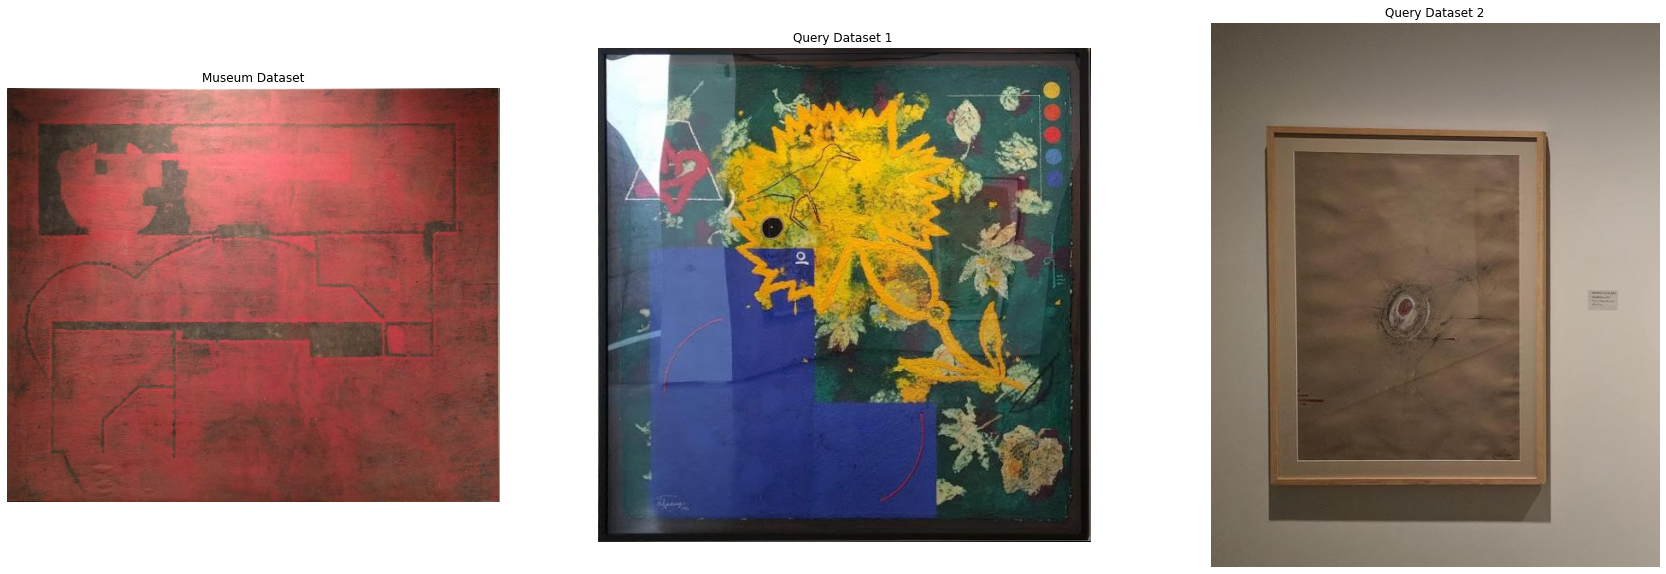

In [80]:
f, axs = plt.subplots(1,3, figsize=(30,10))

axs[0].imshow(random.choice(museum_imgs))
axs[0].title.set_text("Museum Dataset")
axs[1].imshow(random.choice(query_set1_imgs))
axs[1].title.set_text("Query Dataset 1 ")
axs[2].imshow(random.choice(query_set2_imgs))
axs[2].title.set_text("Query Dataset 2")
for ax in axs:
    ax.axis('off') 

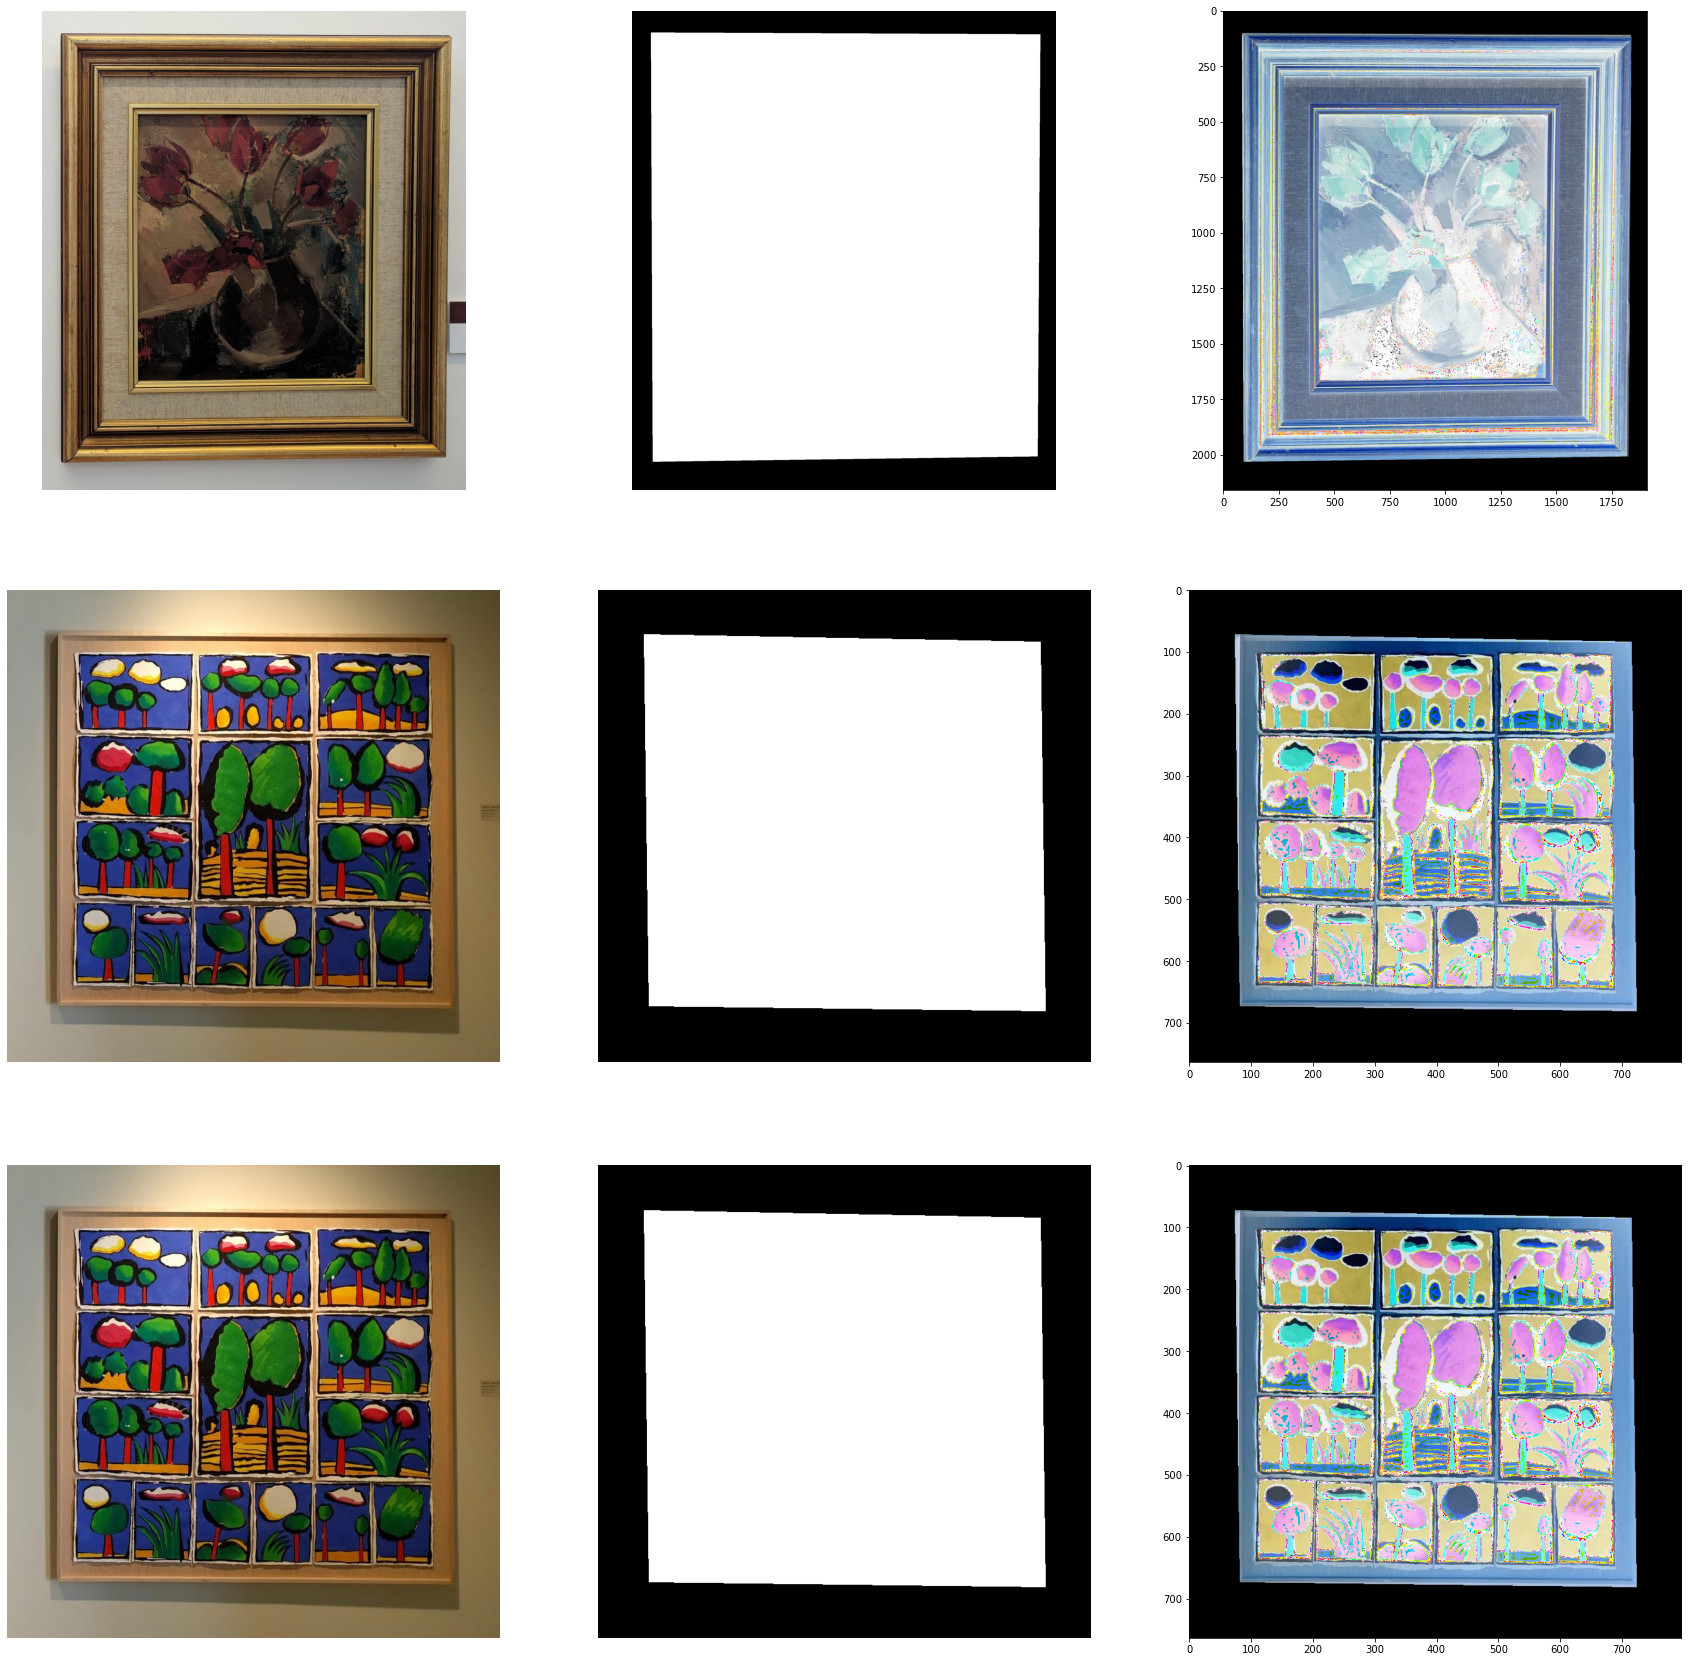

In [81]:
from itertools import product
f, axs = plt.subplots(3,3, figsize=(30,30))

for i in range(3):
    idx = random.randint(0,len(query_set2_imgs)-1)
    axs[i,0].imshow(query_set2_imgs[idx])
    axs[i,1].imshow(query_set2_masks[idx])
    axs[i,2].imshow(query_set2_imgs[idx]*query_set2_masks[idx]/255)

for i,j in product(range(3), range(2)):
    axs[i,j].axis('off')

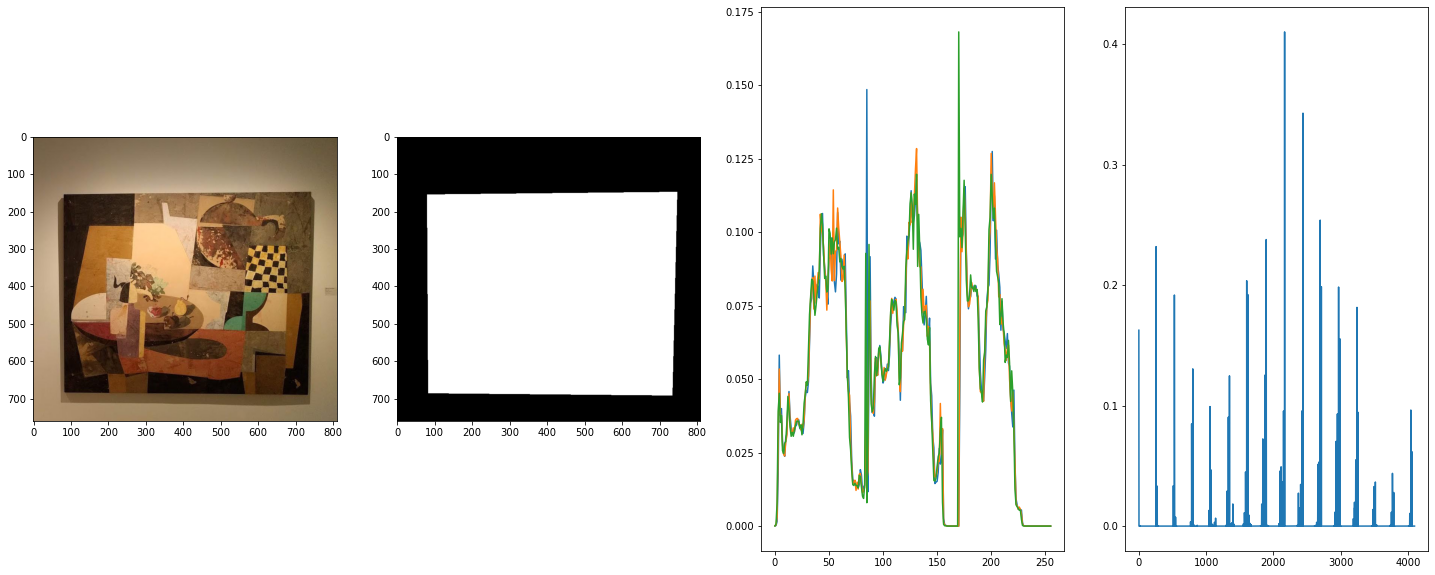

In [96]:
idx = random.randint(0,len(query_set2_imgs)-1)
image, mask = query_set2_imgs[idx], query_set2_masks[idx]
hist_1d = calc_1d_hist(image)
hist_3d = calc_3d_hist(image)

f, axs = plt.subplots(1,4, figsize=(25,10))
axs[0].imshow(image)
axs[1].imshow(mask)
axs[2].plot(hist_1d.reshape(256,3))
axs[3].plot(hist_3d)